In [1]:
import pchempy
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Reading the HDF5 file
runname = 'mars_chemistry_mcd_mean_c13_curiosity'
hlay,Tlay,gasID,isoID,Nlay1,ztime = pchempy.utils.read_hdf5(runname)
nlay = Nlay1.shape[0]
ngas = Nlay1.shape[1]
nt = len(ztime)

#Using the last timestep as the initial condition for the model
Nlay = np.zeros((nlay,ngas),dtype='float64')
Nlay[:,:] = Nlay1[:,:,nt-1]

#Calculating VMRs and total density
N0lay = np.sum(Nlay,axis=1)
VMRlay = np.transpose(np.transpose(Nlay)/N0lay)

#Calculating the pressure
Play = N0lay * pchempy.phys_const['k_B'] * Tlay

rtype, ns, sID, sISO, sf, npr, pID, pISO, pf, rrates = pchempy.photolysisp.calculate_photolysis_rates(hlay,Play,Tlay,Nlay,gasID,isoID,sza=0.0,tauvis=0.0,dist_sun=1.5)

In [ ]:
fig,ax1 = plt.subplots(1,1,figsize=(10,6))

n_phot = len(rtype)

ir = np.where( (sID==2) & (sISO==0) )[0]
print(ir)

for i in range(n_phot):
    
    ax1.plot(rrates[:,i],hlay/1.0e3)


ax1.grid()
ax1.set_xlabel('Reaction rates (s$^{-1}$)')
ax1.set_ylabel('Altitude (km)')
ax1.set_xscale('log')
ax1.set_facecolor('lightgray')
plt.tight_layout()

In [4]:
def name_reaction_photolysis(ns, sID, sISO, sf, npr, pID, pISO, pf):
    
    #from pchempy.dict.gas_dict import gas_info
    
    if ns!=1:
        sys.exit('error :: this reaction is not photolysis. ns must be 1')
        
    if sISO[0]==0:
        sourcel = gas_info[str(sID[0])]['name']
    else:
        sourcel = gas_info[str(sID[0])]['isotope'][str(sISO[0])]['name']
    
    productl = ''
    for i in range(npr):
        
        if pISO[i]==0:
            productxl = gas_info[str(pID[i])]['name']
        else:
            productxl = gas_info[str(pID[i])]['isotope'][str(pISO[i])]['name']
        
        if i<npr-1:
            productl=productl+productxl+' + '
        else:
            productl=productl+productxl
            
    #reaction = sourcel+' h$\nu$ $\rightarrow$ '+productl
    reaction = sourcel+r' + h$\nu$ $\rightarrow$ '+productl
        
    return reaction
        
        

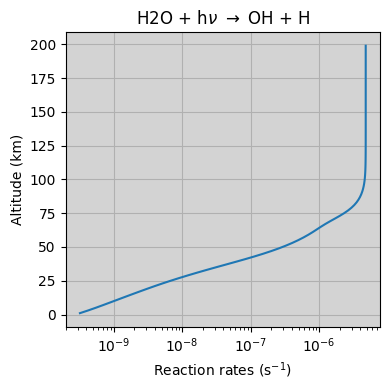

In [5]:
ir = 7
reaction = name_reaction_photolysis(ns[ir], sID[:,ir], sISO[:,ir], sf[:,ir], npr[ir], pID[:,ir], pISO[:,ir], pf[:,ir])

fig,ax1 = plt.subplots(1,1,figsize=(4,4))

ax1.plot(rrates[:,ir],hlay/1.0e3)
    
ax1.grid()
ax1.set_title(reaction)
ax1.set_xlabel('Reaction rates (s$^{-1}$)')
ax1.set_ylabel('Altitude (km)')
ax1.set_xscale('log')
ax1.set_facecolor('lightgray')
plt.tight_layout()

### Testing the python version

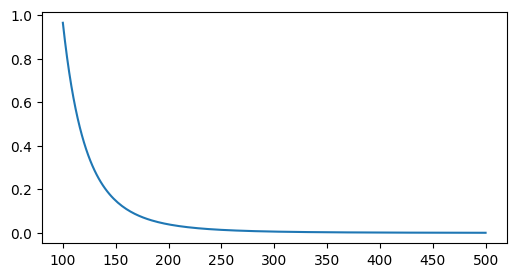

In [6]:
#Calculating the column density of each layer
delz = hlay[1] - hlay[0]   #Assuming all layers have the same height
cdens = Nlay * delz     #m-2

cdenstot = np.sum(cdens,axis=1)  #Total column density in each layer (m-2)

#Setting up dummy wavelengths
wave = np.linspace(100.,500.,201)

dtaur = setray_mars(cdenstot,wave)

fig,ax1 = plt.subplots(1,1,figsize=(6,3))
ax1.plot(wave,dtaur[0,:])